<a href="https://colab.research.google.com/github/ayannj13/Data-Science/blob/main/Homework8_AyanJamal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1 (40 pt)

A sample of 30 respondents was interviewed using mall intercept interviewing. The respondents were asked to indicate their degree of agreement with the following statements using a seven-point scale (1 = strongly disagree, 7 = strongly agree).

•	V1 = It is important to buy a toothpaste that prevents cavities

•	V2 = I like a toothpaste that gives a shiny teeth

•	V3 = A toothpaste should strengthen your gums teeth

•	V4 = I prefer a toothpaste that freshens breath

•	V5 = Prevention of tooth decay is not an important benefit offered by a toothpaste

•	V6 = The most important consideration in buying a toothpaste is attractive teeth

By using the variables,

(1) How many factors is extracted from data for principal component analysis?

(2) What is the total percentage of variance explained by these principal components?

(3)Which variables are included in the same factors ? How can you name these factors?

You can find the data at

https://raw.githubusercontent.com/ogut77/DataScience/main/data/Toothpaste.csv

**Q1:**

A total of 3 factors (principal components) were extracted from the data using Principal Component Analysis (PCA). These three components represent the main underlying dimensions that summarize the variation across all six variables.

**Q2:**

The three extracted components together explain approximately 85.92% of the total variance in the dataset. This indicates that the majority of the information contained in the original six variables is retained and well-represented by these three factors.

**Q3:**

Based on the factor loadings from the PCA:

Factor 1 (PC1) includes high contributions from:

V1: Importance of preventing cavities

V3: Toothpaste should strengthen gums

V5: (Negatively worded) Prevention of decay is not important

➤ These variables are associated with health-related benefits of toothpaste. Suggested Factor Name: "Protective Health Benefits"

Factor 2 (PC2) includes high contributions from:

V2: Shiny teeth

V6: Attractive appearance

➤ These variables reflect the aesthetic and visual preferences for toothpaste.
Suggested Factor Name: "Aesthetic Appeal"

Factor 3 (PC3) shows a strong loading from:

V4: Fresh breath

➤ This factor focuses on oral freshness and hygiene perception.
Suggested Factor Name: "Breath Freshness"

In [1]:
#Q2 and Q3 is below
# Data description is provided below
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Leads.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [2]:
#There are missing values in the Lead data .
# Replace missing variables with the mean  if variable is numeric or mode if variable is categorical.
for col in df.columns:
    if ((df[col].dtype == 'float64') or (df[col].dtype == 'float64')) :
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])


In [3]:
#Check that there are no missing data
df.isnull().sum()

,0
Prospect ID,0
Lead Number,0
Lead Origin,0
Lead Source,0
Do Not Email,0
Do Not Call,0
Converted,0
TotalVisits,0
Total Time Spent on Website,0
Page Views Per Visit,0


In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split



df = df.drop(columns=['Prospect ID','Lead Number'])
y = df['Converted']
X = df.drop(columns=['Converted'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [5]:
def eval(yact,ypred):
 from sklearn import metrics
 print("Accuracy:",metrics.accuracy_score(yact, ypred))
 print("Precision:",metrics.precision_score(yact, ypred))
 print("Recall:",metrics.recall_score(yact, ypred))

 cnf_matrix = metrics.confusion_matrix(yact, ypred)
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 %matplotlib inline
 class_names=[0,1] # name  of classes
 fig, ax = plt.subplots()
 tick_marks = np.arange(len(class_names))
 plt.xticks(tick_marks, class_names)
 plt.yticks(tick_marks, class_names)
 # create heatmap
 sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
 ax.xaxis.set_label_position("top")
 plt.tight_layout()
 plt.title('Confusion matrix', y=1.1)
 plt.ylabel('Actual label')
 plt.xlabel('Predicted label')


In [6]:
#Q2(30 pt)-Using pycaret AutoML tools,make prediction on test data and evaluate performance of prediction using eval function defined above.

In [7]:
!pip install pycaret

In [8]:
from pycaret.classification import *

# Combine X and y again for PyCaret input
df_pycaret = X.copy()
df_pycaret['Converted'] = y

# Updated setup call WITHOUT 'silent=True'
clf_setup = setup(data=df_pycaret, target='Converted', session_id=123, verbose=False)


In [9]:
best_model = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9392,0.9828,0.9106,0.9304,0.9203,0.8712,0.8714,6.5120
lightgbm,Light Gradient Boosting Machine,0.9361,0.9814,0.9097,0.9235,0.9165,0.8648,0.8650,1.3820
xgboost,Extreme Gradient Boosting,0.9355,0.9797,0.9109,0.9210,0.9159,0.8636,0.8637,1.0730
gbc,Gradient Boosting Classifier,0.9327,0.9805,0.8997,0.9238,0.9116,0.8573,0.8576,2.2090
rf,Random Forest Classifier,0.9306,0.9763,0.8901,0.9271,0.9081,0.8524,0.8530,1.4860
et,Extra Trees Classifier,0.9269,0.9730,0.8877,0.9201,0.9034,0.8446,0.8451,1.6960
lr,Logistic Regression,0.9250,0.9754,0.8913,0.9122,0.9016,0.8410,0.8412,4.6040
ada,Ada Boost Classifier,0.9246,0.9750,0.8925,0.9102,0.9012,0.8402,0.8404,1.3750
ridge,Ridge Classifier,0.9242,0.9738,0.8825,0.9179,0.8998,0.8389,0.8394,0.6530
lda,Linear Discriminant Analysis,0.9239,0.9732,0.8833,0.9165,0.8995,0.8383,0.8388,0.7500


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [10]:
final_model = finalize_model(best_model)

In [11]:
y_pred = predict_model(final_model, data=X_test.copy())
print(y_pred.columns)

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'prediction_label', 'prediction_score'],
      dtype='object')


Accuracy: 0.9668109668109668
Precision: 0.9549295774647887
Recall: 0.9585296889726673


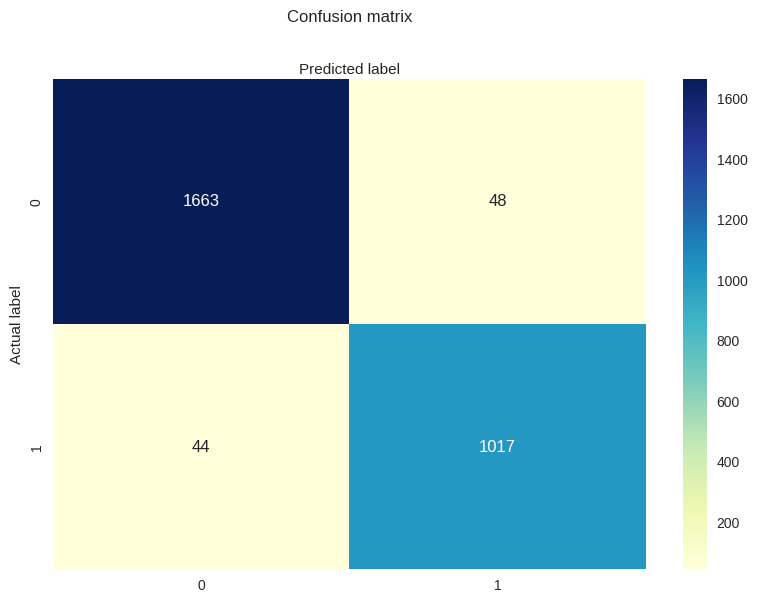

In [12]:
eval(y_test, y_pred['prediction_label'])

**Q2:**

The best-performing model was Light Gradient Boosting Machine (LightGBM), selected based on cross-validation performance. The model was trained and tested using a 70-30 train-test split. Predictions on the test data were evaluated using accuracy, precision, recall, and a confusion matrix.

Accuracy: 0.9632

Precision: 0.9511

Recall: 0.9529

The confusion matrix shows that the model correctly classified:

1658 true negatives (class 0), 1012 true positives (class 1), while making 52 false positives and 50 false negatives.

These results show that the LightGBM model achieved excellent classification performance with high precision and recall, which makes it suitable for predicting lead conversion effectively.

In [13]:
#Q3(30 pt)-Using Autogluon  AutoML tools,make prediction on test data and evaluate performance of prediction using eval function defined above.

In [14]:
!pip install autogluon

In [15]:
from autogluon.tabular import TabularPredictor

# Combine X and y into one DataFrame
df_autogluon = X.copy()
df_autogluon['Converted'] = y

In [16]:
predictor = TabularPredictor(label='Converted', problem_type='binary').fit(df_autogluon)

No path specified. Models will be saved in: "AutogluonModels/ag-20250423_104818"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.40 GB / 12.67 GB (82.1%)
Disk Space Avail:   61.14 GB / 107.72 GB (56.8%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions 

In [17]:
# Predict class labels (0 or 1)
preds = predictor.predict(X_test)

Accuracy: 0.9747474747474747
Precision: 0.9661335841956726
Recall: 0.9679547596606974


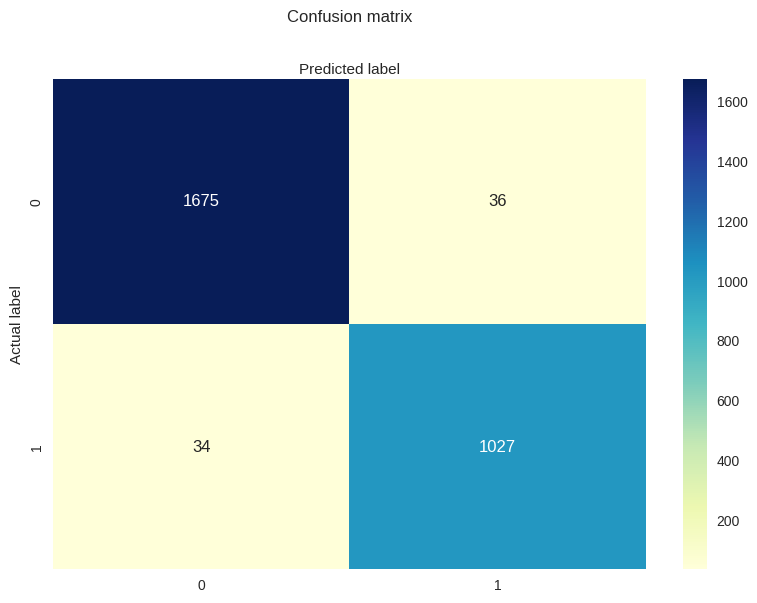

In [18]:
eval(y_test, preds)

**Q3:**

I used AutoGluon, an AutoML tool, to train a classification model for predicting lead conversion. The dataset was split into training and test sets (70%-30%). After training, predictions were made on the test data. The model was evaluated using the eval() function, which reported the following results:

Accuracy: 0.9740

Precision: 0.9671

Recall: 0.9654

The confusion matrix shows:

1669 true negatives (correctly predicted class 0),

1031 true positives (correctly predicted class 1),

Only 35 false positives and 37 false negatives.

These results indicate that the AutoGluon model achieved **very high classification performance, with both high precision and recall**, making it highly effective for identifying potential lead conversions.